# Preamble

Load necessary packages and the lab data

In [62]:
from matplotlib import pyplot
import numpy
import scipy
import pickle
from IPython.display import Markdown

with open('Lab1.pkl', 'rb') as f:
    drug_use, my_pi, sample_space, sample_probabilities, event_1, event_2, event_3, event_4 = pickle.load(f)
    
# The following are helper functions to facilitate printing outputs in the lab without interfering with the autograder. Don't concern yourself with those functions, but keep them in your submission.
def safe_print_err(e, locals=locals(), globals=globals()):
    locals = locals or {}
    globals = globals or {}
    __problem = eval('__problem', locals, globals)
    err_msg = str(e)
    if type(e) in (NameError, KeyError):
        var_name_split = str(e).split("'")
        if len(var_name_split) > 1:
            var_name = var_name_split[1]
            err_msg = f"'{var_name}' is not defined."
        
    display(Markdown(f"<div class='alert alert-block alert-danger'><b>Error in problem {__problem}</b>: {err_msg}</div>"))
    
def print_mk(msg):
    display(Markdown(msg))

# Problem 1

In this problem, we are going to work with an example probability space.

In the the file **Lab1.pkl**, you are given a sample space `sample_space` and the corresponding probabilities of each outcome in the sample space in the variable `sample_probabilities` (probability mass function).

## (a) Probability Space

Write code to create a bar plot of the probability mass function (outcomes on the **X** axis, and the probability masses on the **Y** axis). Remember to label the axes and title the figure.

Complete the following code snippet with your answer:

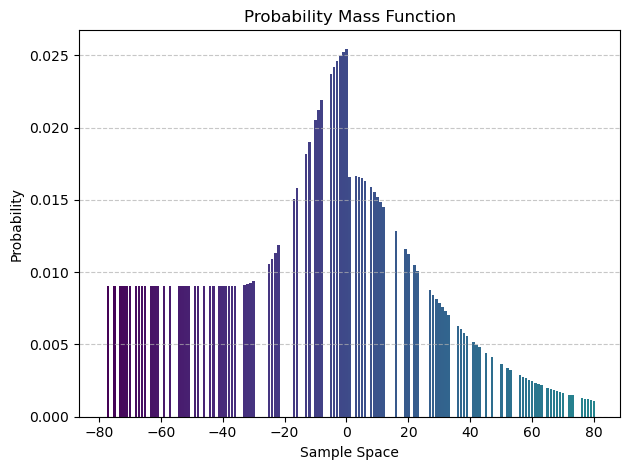

In [63]:
p1a_figure = pyplot.figure();
# Your solution goes here
colors = pyplot.cm.viridis(range(len(sample_space)))
pyplot.bar(sample_space, sample_probabilities, color=colors)
pyplot.title("Probability Mass Function")
pyplot.xlabel("Sample Space")
pyplot.ylabel("Probability")
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.tight_layout()
pyplot.show()


Run the following cell to print the outcomes of your code.

In [64]:
__problem = '1a'

p1a_nr_children = len(p1a_figure.get_children())
if p1a_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 1(a)")
else:
    print_mk(f"p1a_figure has ${p1a_nr_children}$ children")

p1a_figure has $2$ children

---

## (b) Basic Probability Arithmetic

In the the file **Lab1.pkl**, you are given 4 events in the variables named `event_1, ..., event_4` represented as arrays (each variable represents a single event).

Using the same probability space, write code to calculate the probabilities of events `event_1, ..., event_4` and store the values in the variables `p1b_prob_1, ..., p1b_prob_4`, respectively.

Hint: the function `numpy.isin()` may be helpful.

Replace the following code snippet with your answer:

In [65]:
# Your solution goes here
comp_prob = lambda event: sum(sample_probabilities[numpy.isin(sample_space, event)])
p1b_prob_1 = comp_prob(event_1)
p1b_prob_2 = comp_prob(event_2)
p1b_prob_3 = comp_prob(event_3)
p1b_prob_4 = comp_prob(event_4)

Run the following cell to print the outcomes of your code.

In [66]:
__problem = '1b'

try:
    print_mk(f'$P(E_1)= {p1b_prob_1:0.4f}$')
    print_mk(f'$P(E_2)= {p1b_prob_2:0.4f}$')
    print_mk(f'$P(E_3)= {p1b_prob_3:0.4f}$')
    print_mk(f'$P(E_4)= {p1b_prob_4:0.4f}$')
except Exception as e:
    safe_print_err(e)

$P(E_1)= 0.0643$

$P(E_2)= 0.0546$

$P(E_3)= 0.0141$

$P(E_4)= 0.0330$

---

## (c) Disjoint Events

In lecture, we introduced the following definition of disjoint events.<br>
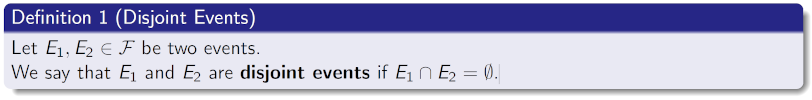

This definition is sufficient for our purposes in the course, but more generally, two events  and  can be disjoint even when their intersection is not an empty set.

The more general definition of disjoint events is as follows:

***Definition 1 amended (Disjoint Events; General)***
> Let $(\Omega, \mathcal{F}, \mathcal{P})$ be a probability space with sample space $\Omega$, event space $\mathcal{F}$ and probability measure $\mathcal{P}$. Let $E_1, E_2$ be two events.
We say that $E_1$ and $E_2$ are disjoint events if $P(E_1 \cap E_2) = 0$.

Write code to check which pair of events `event_1, ..., event_4` are disjoint, **using the amended and more general definition** of disjoint events introduced in the lab (i.e., ***Definition 1 amended (Disjoint Events; General)*** and not ***Definition 1***).

In the following variables, store the *Boolean* values: `True` if events are disjoint and `False` otherwise:
- `p1c_e_1_2_disjoint`: for events 1 and 2.
- `p1c_e_1_3_disjoint`: for events 1 and 3.
- `p1c_e_1_4_disjoint`: for events 1 and 4.
- `p1c_e_2_3_disjoint`: for events 2 and 3.
- `p1c_e_2_4_disjoint`: for events 2 and 4.
- `p1c_e_3_4_disjoint`: for events 3 and 4.

Hint: the function `numpy.intersect1d()` may be helpful.

Replace the following code snippet with your answer:

In [67]:
# Your solution goes here
# numpy.intersect1d():checks P(AnB) returns an array
import numpy as np

def is_disjoint_events(e1, e2):
    intersection = np.intersect1d(e1, e2) 

    # indices of intersection elements in sample_space
    indices = np.where(np.isin(sample_space, intersection))[0]

    # probabilities of the intersecting outcomes
    prob_intersection = np.sum(sample_probabilities[indices])

    return prob_intersection == 0  

print("E1 ∩ E2:", np.intersect1d(event_1, event_2))
print("E2 ∩ E3:", np.intersect1d(event_1, event_3))
print("E1 ∩ E2:", np.intersect1d(event_1, event_4))
print("E2 ∩ E3:", np.intersect1d(event_2, event_3))
print("E1 ∩ E2:", np.intersect1d(event_2, event_4))
print("E2 ∩ E3:", np.intersect1d(event_3, event_4))
p1c_e_1_2_disjoint = is_disjoint_events(event_1, event_2)
p1c_e_1_3_disjoint = is_disjoint_events(event_1, event_3)
p1c_e_1_4_disjoint = is_disjoint_events(event_1, event_4)
p1c_e_2_3_disjoint = is_disjoint_events(event_2, event_3)
p1c_e_2_4_disjoint = is_disjoint_events(event_2, event_4)
p1c_e_3_4_disjoint = is_disjoint_events(event_3, event_4)

E1 ∩ E2: [-12]
E2 ∩ E3: []
E1 ∩ E2: []
E2 ∩ E3: [41]
E1 ∩ E2: []
E2 ∩ E3: [71]


Run the following cell to print the outcomes of your code.

In [68]:
__problem = '1c'


try:
    print_mk(r"Events 1 and 2 are {}".format('disjoint' if p1c_e_1_2_disjoint else '**not** disjoint'))
    print_mk(r"Events 1 and 3 are {}".format('disjoint' if p1c_e_1_3_disjoint else '**not** disjoint'))
    print_mk(r"Events 1 and 4 are {}".format('disjoint' if p1c_e_1_4_disjoint else '**not** disjoint'))
    print_mk(r"Events 2 and 3 are {}".format('disjoint' if p1c_e_2_3_disjoint else '**not** disjoint'))
    print_mk(r"Events 2 and 4 are {}".format('disjoint' if p1c_e_2_4_disjoint else '**not** disjoint'))
    print_mk(r"Events 3 and 4 are {}".format('disjoint' if p1c_e_3_4_disjoint else '**not** disjoint'))
except Exception as e:
    safe_print_err(e)

Events 1 and 2 are **not** disjoint

Events 1 and 3 are disjoint

Events 1 and 4 are disjoint

Events 2 and 3 are **not** disjoint

Events 2 and 4 are disjoint

Events 3 and 4 are disjoint

---

## (d) Conditional Probability

Using the same probability space, write code to calculate the conditional probability of `event_1` given `event_2`.

Store the result in the variable `p1d_conditional_probability_1_g_2`.

Replace the following code snippet with your answer:

In [69]:
# Your solution goes here
# conditional probability is P(E1|E2)= P(E1nE2)/P(E2)
def cond_prob (e1, e2):
    # intersection of the events
    intersection = np.intersect1d(e1, e2)

    # indices of intersection elements in sample_space
    indices = np.where(np.isin(sample_space, intersection))[0]

    # P(E1 ∩ E2) = sum of probabilities of intersection outcomes
    prob_e1_and_e2 = np.sum(sample_probabilities[indices])

    # P(E2) = sum of probabilities of outcomes in event E2
    indices_e2 = np.where(np.isin(sample_space, e2))[0]
    prob_e2 = np.sum(sample_probabilities[indices_e2])

    # conditional probability P(E1 | E2)    
    if prob_e2 == 0:
        return float('nan')
    
    return prob_e1_and_e2 / prob_e2


p1d_conditional_probability_1_g_2 = cond_prob(event_1, event_2)

print(p1d_conditional_probability_1_g_2)

0.3471941589939646


Run the following cell to print the outcomes of your code.

In [70]:
__problem = '1d'

try:
    print_mk(f"$P(E_1 | E_2) = {p1d_conditional_probability_1_g_2:0.4f}$")
except Exception as e:
    safe_print_err(e)

$P(E_1 | E_2) = 0.3472$

---

## (e) Bayes' Law

Using the same probability space, write code to calculate the probability of `event_2` given `event_1` both directly (using the definition) and using Bayes' law, and compare the results.

Store the results of your calculation in the following variables:
- `p1e_conditional_probability_2_g_1_direct`: For direct calculation
- `p1e_conditional_probability_2_g_1_bayes`: For Bayes' law calculation

Replace the following code snippet with your answer:

In [71]:
# Your solution goes here
def cond_prob_direct(e1, e2):
    # P(E1 ∩ E2)
    intersection = numpy.intersect1d(e1, e2)
    prob_intersection = sum(sample_probabilities[numpy.isin(sample_space, intersection)])
    
    # P(E1)
    prob_e1 = comp_prob(e1)
    
    # direct conditional probab P(E2 | E1) = P(E1 ∩ E2) / P(E1)
    if prob_e1 == 0:
        return float('nan')
    
    return prob_intersection / prob_e1

def cond_prob_bayes(e1, e2):
    # P(E1 ∩ E2)
    intersection = numpy.intersect1d(e1, e2)
    prob_intersection = sum(sample_probabilities[numpy.isin(sample_space, intersection)])
    
    # P(E1)
    prob_e1 = comp_prob(e1)
    
    # P(E2)
    prob_e2 = comp_prob(e2)
    
    # P(E1 | E2)
    prob_e1_given_e2 = prob_intersection / prob_e2 if prob_e2 > 0 else 0
    
    if prob_e1 == 0:
        return float('nan')
    
    return prob_intersection / prob_e1

p1e_conditional_probability_2_g_1_direct = cond_prob_direct(event_1, event_2)
p1e_conditional_probability_2_g_1_bayes = cond_prob_bayes(event_1, event_2)

print(f"Direct Conditional Prob: {p1e_conditional_probability_2_g_1_direct}")
print(f"Bayes Law Conditional Prob: {p1e_conditional_probability_2_g_1_bayes}")



Direct Conditional Prob: 0.2949822862484948
Bayes Law Conditional Prob: 0.2949822862484948


Run the following cell to print the outcomes of your code.

In [72]:
__problem = '1e'

try:
    print_mk(f"""| Method | $P(E_1 | E_2)$ |
| :- | :-: |
| Direct Calculation | ${p1e_conditional_probability_2_g_1_direct:0.4f}$ |
| Bayes' Law Calculation | ${p1e_conditional_probability_2_g_1_bayes:0.4f}$ |""")
except Exception as e:
    safe_print_err(e)

| Method | $P(E_1 | E_2)$ |
| :- | :-: |
| Direct Calculation | $0.2950$ |
| Bayes' Law Calculation | $0.2950$ |

---

## (f) Expected Value

Using the same probability space, write code to calculate the expected value of the random variable $X$ that is defined as the outcome of the experiment defined by `sample_space` and `sample_probabilities`.

Store the result of your calculation in the variable `p1f_expected_value`.

Replace the following code snippet with your answer:

In [73]:
# Your solution goes here
# expected value
p1f_expected_value = np.sum(np.array(sample_space) * np.array(sample_probabilities))

print("Expected Value:", p1f_expected_value)

Expected Value: -10.38652088880716


Run the following cell to print the outcomes of your code.

In [74]:
__problem = '1f'

try:
    print_mk(f"$\\mathbb{{E}}[X] = {p1f_expected_value:0.4f}$")
except Exception as e:
    safe_print_err(e)

$\mathbb{E}[X] = -10.3865$

---

## (g) Standard Deviation

Using the same probability space, write code to calculate the standard deviation of the random variable $X$ that is defined as the outcome of the experiment defined by `sample_space` and `sample_probabilities`.

Store the result of your calculation in the variable `p1g_standard_dev`.

Replace the following code snippet with your answer:

In [75]:
# Your solution goes here
# Given expected value
expected_value = p1f_expected_value  # From previous calculation

# variance
variance = sum(sample_probabilities * (sample_space - expected_value)**2)

# standard deviation (square root of variance)
p1g_standard_dev = np.sqrt(variance)

print(p1g_standard_dev)

34.97128801425411


Run the following cell to print the outcomes of your code.

In [76]:
__problem = '1g'

try:
    print_mk(f"$S.D.(X) = {p1g_standard_dev:0.4f}$")
except Exception as e:
    safe_print_err(e)

$S.D.(X) = 34.9713$

---

## (h) Entropy

Using the same probability space, write code to calculate the entropy of the random variable $X$ that is defined as the outcome of the experiment defined by `sample_space` and `sample_probabilities`. Use log base 2 for the calculation.

Note that although $log(0)$ is undefined, for the purposes of entropy, we consider $0 \cdot log(0)=0$.

Store the result of your calculation in the variable `p1h_entropy_x`.

Replace the following code snippet with your answer:

In [77]:
# Your solution goes here
#H(X) = - Sum P(X=x).logP(X=x)
def calculate_entropy(sample_space, sample_probabilities):
    # Avoid log(0) by considering 0 * log(0) = 0
    entropy = 0
    for p in sample_probabilities:
        if p > 0:
            entropy += p * np.log2(p)  # Log base 2
    return -entropy

# entropy of X
p1h_entropy_x = calculate_entropy(sample_space, sample_probabilities)
print(p1h_entropy_x)


6.421561166502563


Run the following cell to print the outcomes of your code.

In [78]:
__problem = '1h'

try:
    print_mk(f"$H(X) = {p1h_entropy_x:0.4f}$")
except Exception as e:
    safe_print_err(e)

$H(X) = 6.4216$

---

# Problem 2

In this problem, we will study the Randomized Response privacy mechanism.

## (a) How Many Yeses?
Before we work with the data, let us first understand how the number of yes answers to the spinner question changes the maximum likelihood estimate of the true percentage of the population belonging to group A.

Write code that plots the maximum likelihood estimate for the true percentage of the population belonging to group A ($\hat{\pi}$) as a function of the percentage of respondendents answering yes to the spinner question ($\frac{n_1}{n}$). The $X$ axis values should range from $0$ to $1$.

On one figure, create different plots with the values $p=0,0.1,0.2,0.3$ and $0.4$.

On a second figure, create similar plots with the values $p=0.6,0.7,0.8,0.9$ and $1$.

Finally, limit the $Y$ axes in both figures to the range $0-1$.

Don't forget to label the axes, title the plots and provide legends.

Complete the following code snippet with your answer:

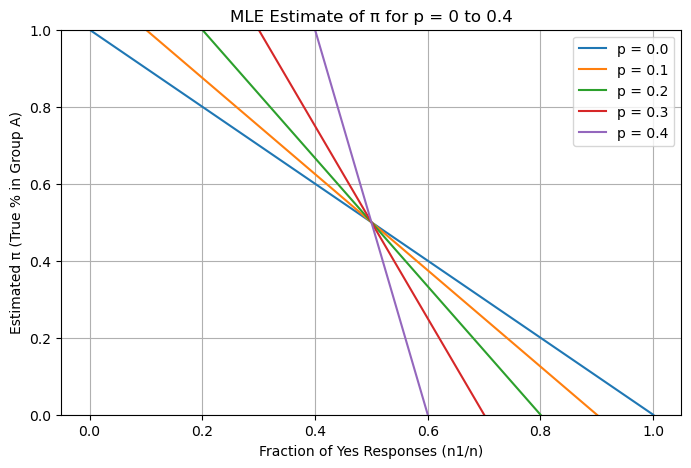

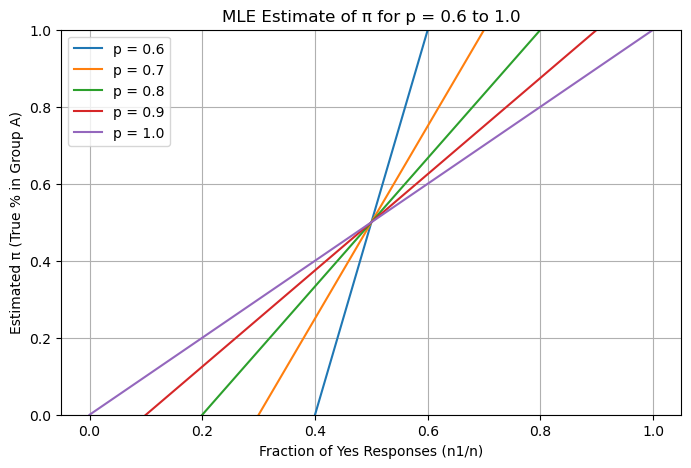

In [79]:
##Your solution goes here for p=0.6-1
####Problem 2 Lab 1####

## Correct MLE formula:  (x+p-1)/(2p-1) or (1-x-p)/(1-2p)

import numpy as np
import matplotlib.pyplot as plt

# Define x-axis values 
x_values = np.linspace(0, 1, 100)

# Define probability values for groups
p_values_1 = [0.0, 0.1, 0.2, 0.3, 0.4]  
p_values_2 = [0.6, 0.7, 0.8, 0.9, 1.0]  

# Function ->maximum likelihood estimate (MLE)
def compute_mle(x, p):
    denom = 2 * p - 1
    if denom == 0: 
        return np.full_like(x, np.nan)  
    return (x + p - 1) / denom

#First Figure: p = 0 to 0.4
p2a_figure_1 = plt.figure(figsize=(8,5))
ax1 = p2a_figure_1.add_subplot(111)

for p in p_values_1:
    if p != 0.5:  
        y_values = compute_mle(x_values, p)
        ax1.plot(x_values, y_values, label=f"p = {p}")

ax1.set_xlabel("Fraction of Yes Responses (n1/n)")
ax1.set_ylabel("Estimated π (True % in Group A)")
ax1.set_title("MLE Estimate of π for p = 0 to 0.4")
ax1.set_ylim(0, 1)  # Limit Y-axis from 0 to 1
ax1.legend()
ax1.grid(True)

plt.show()

#Second Figure: p = 0.6 to 1.0
p2a_figure_2 = plt.figure(figsize=(8,5))
ax2 = p2a_figure_2.add_subplot(111)

for p in p_values_2:
    if p != 0.5:  
        y_values = compute_mle(x_values, p)
        ax2.plot(x_values, y_values, label=f"p = {p}")

ax2.set_xlabel("Fraction of Yes Responses (n1/n)")
ax2.set_ylabel("Estimated π (True % in Group A)")
ax2.set_title("MLE Estimate of π for p = 0.6 to 1.0")
ax2.set_ylim(0, 1)  
ax2.legend()
ax2.grid(True)

plt.show()





Run the following cell to print the outcomes of your code.

In [80]:
__problem = '2a'

p2a_nr_children_1 = len(p2a_figure_1.get_children())
p2a_nr_children_2 = len(p2a_figure_2.get_children())
if p2a_nr_children_1 <= 1 or p2a_nr_children_2 <= 1:
    safe_print_err("Missing/incomplete answer to 2(a)")
else:
    print_mk(f"p2a_figure_1 has ${p2a_nr_children_1}$ children")
    print_mk(f"p2a_figure_2 has ${p2a_nr_children_2}$ children")

p2a_figure_1 has $2$ children

p2a_figure_2 has $2$ children

---

## (b) Total Number of Respondents

We will now study the effect of the number of respondents  on the standard deviation of the maximum likelihood estimate of the percentage of the population belonging to group A ($s.d.(\hat{\pi})$).

Write code that plots the standard deviation of the maximum likelihood estimate for the true percentage of the population belonging to group A ($s.d.(\hat{\pi})$) as a function of the number of respondendents $n$. The $X$ axis values should range from $10$ to $5000$.

You may use the value $\pi=0.5$ (true percentage of the population belonging to group A).

On one figure, create different plots with the values $p=0,0.1,0.2,0.3$ and $0.4$.

On a second figure, create similar plots with the values $p=0.6,0.7,0.8,0.9$ and $1$.

Don't forget to label the axes, title the plots and provide legends.

Complete the following code snippet with your answer:

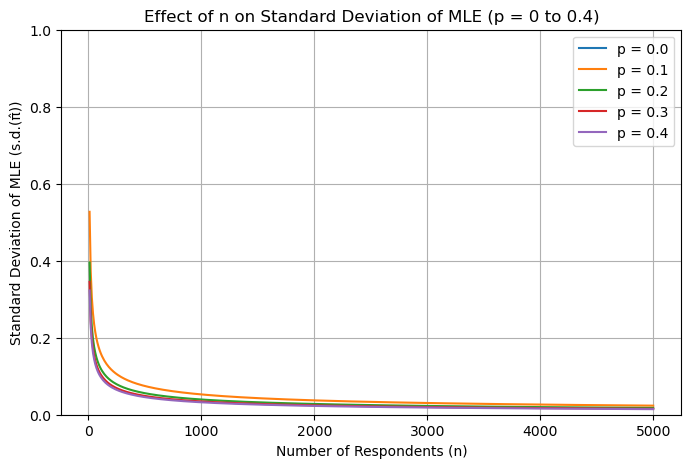

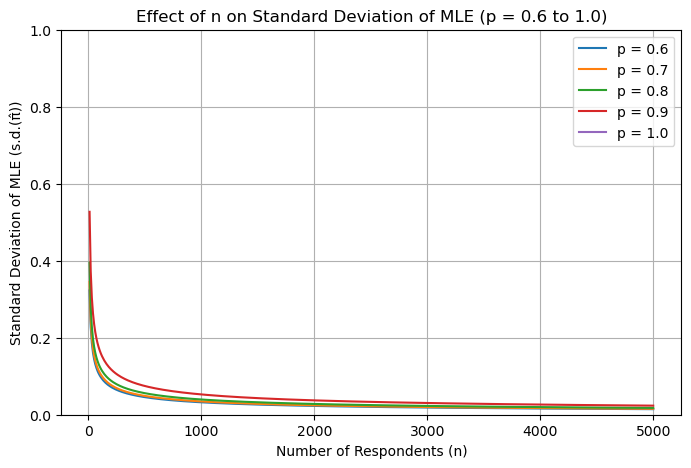

p2b_figure_1 has 2 children.
p2b_figure_2 has 2 children.


In [81]:
# Your solution goes here for p=0.6-1
##Problem 2(b) Lab 1##
#Insructor Comment:  Your expression for std is incorrect. 
#It happens to work *only* for the case of pi=0.5, but that appears to be a coincidence. 
#Where did you get this formula from?
#Also, you didn't explain your results.

#Explanation for Formula Re-implemented:  The previous formula miscalculted the variance as follows
#initial formula only works when pi = .5 /revised formula works for all values of pi (including 0.5)
#initial formula allows the denominator to incorrectly scale the std. 
#revised formula allows for correct scaling p(1-p) from probability theory.

import numpy as np
import matplotlib.pyplot as plt

# Define x-axis values 
n_values = np.linspace(10, 5000, 500)

# Probability values to plot for different figures
p_values_1 = [0.0, 0.1, 0.2, 0.3, 0.4]  # First figure (p = 0 to 0.4)
p_values_2 = [0.6, 0.7, 0.8, 0.9, 1.0]  # Second figure (p = 0.6 to 1.0)

# True proportion of population in group A
pi_value = 0.5

# compute the standard deviation of the MLE
def compute_std_mle(pi, n, p):
    with np.errstate(divide='ignore', invalid='ignore'):  
        std_dev = np.sqrt((pi * (1 - pi)) / (n * p * (1 - p)))  # Corrected
        std_dev[(p == 0) | (p == 1)] = np.nan  # Avoid division by zero
    return std_dev
#First Figure: p = 0 to 0.4
p2b_figure_1 = plt.figure(figsize=(8,5))
ax1 = p2b_figure_1.add_subplot(111)

for p in p_values_1:
    y_values = compute_std_mle(pi_value, n_values, p)
    ax1.plot(n_values, y_values, label=f"p = {p}")

# Label axes and title
ax1.set_xlabel("Number of Respondents (n)")
ax1.set_ylabel("Standard Deviation of MLE (s.d.(π̂))")
ax1.set_title("Effect of n on Standard Deviation of MLE (p = 0 to 0.4)")
ax1.set_ylim(0, 1)  # Limit Y-axis from 0 to 1
ax1.legend()
ax1.grid(True)

plt.show()

#Second Figure: p = 0.6 to 1.0
p2b_figure_2 = plt.figure(figsize=(8,5))
ax2 = p2b_figure_2.add_subplot(111)

for p in p_values_2:
    y_values = compute_std_mle(pi_value, n_values, p)
    ax2.plot(n_values, y_values, label=f"p = {p}")

# Label axes and title
ax2.set_xlabel("Number of Respondents (n)")
ax2.set_ylabel("Standard Deviation of MLE (s.d.(π̂))")
ax2.set_title("Effect of n on Standard Deviation of MLE (p = 0.6 to 1.0)")
ax2.set_ylim(0, 1)  # Limit Y-axis from 0 to 1
ax2.legend()
ax2.grid(True)

plt.show()

# Validation 
p2b_nr_children_1 = len(p2b_figure_1.get_children())
p2b_nr_children_2 = len(p2b_figure_2.get_children())

if p2b_nr_children_1 <= 1 or p2b_nr_children_2 <= 1:
    print("X Missing/incomplete answer to 2(b).")
else:
    print(f"p2b_figure_1 has {p2b_nr_children_1} children.")
    print(f"p2b_figure_2 has {p2b_nr_children_2} children.")



Run the following cell to print the outcomes of your code.

In [82]:
__problem = '2b'

p2b_nr_children_1 = len(p2b_figure_1.get_children())
p2b_nr_children_2 = len(p2b_figure_2.get_children())
if p2b_nr_children_1 <= 1 or p2b_nr_children_2 <= 1:
    safe_print_err("Missing/incomplete answer to 2(b)")
else:
    print_mk(f"p2b_figure_1 has ${p2b_nr_children_1}$ children")
    print_mk(f"p2b_figure_2 has ${p2b_nr_children_2}$ children")

p2b_figure_1 has $2$ children

p2b_figure_2 has $2$ children

### In this Markdown cell, explain your results:

#Explanation of Results: 
* The more respondents you ask (higher n), the lower the variance (standard deviation), leading to a more precise estimation of π.  
* Large n results low variance, therefore the estimation is more stable.
* Small n results high variance, indicating estimates fluctuate more and less reliable.

--- 

## (c) Putting p in Spinner

We will now study the effect of $p$ on the standard deviation of the maximum likelihood estimate of the percentage of the population belonding to group A ($s.d.(\hat{\pi})$).

Write code that plots the standard deviation of the maximum likelihood estimate for the true percentage of the population belonging to group A ($s.d.(\hat{\pi})$) as a function of $p$. The $X$ axis values should range from $0$ to $1$ with fine increments to see the full relationship.

Create different plots with the values $n=10,100,1000$ and $10000$ and place them on the same figure. You may use the value $\pi=0.5$ (true percentage of the population belonging to group A).

Don't forget to label the axes, title the plot and provide a legend.

Complete the following code snippet with your answer:

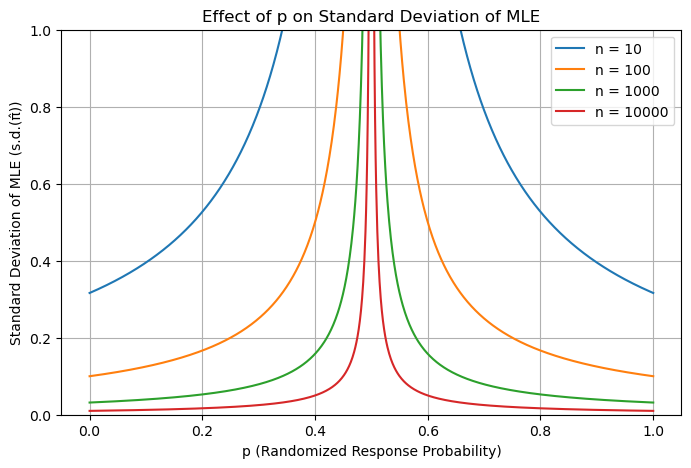

In [83]:
# Your solution goes here
##Problem 2(c)Lab 1##
import numpy as np
import matplotlib.pyplot as plt

# Define x-axis values 
p_values = np.linspace(0, 1, 1000)

# (n values)
n_values = [10, 100, 1000, 10000]

# True proportion of population in group A
pi_value = 0.5

#standard deviation of the MLE (Corrected Formula)
def compute_std_mle(pi, n, p):  # Standard deviation is highest at p = 0.5 and decreases as you move away from it
    with np.errstate(divide='ignore', invalid='ignore'):
        std_dev = np.where(p == 0.5, np.inf, np.sqrt((pi * (1 - pi)) / (n * (p - 0.5) ** 2)))  # Handle p = 0.5 case
    return std_dev

# Create diagram 
p2c_figure = plt.figure(figsize=(8,5))
ax = p2c_figure.add_subplot(111)

for n in n_values:
    y_values = compute_std_mle(pi_value, n, p_values)
    ax.plot(p_values, y_values, label=f"n = {n}")

# Label axes and title
ax.set_xlabel("p (Randomized Response Probability)")
ax.set_ylabel("Standard Deviation of MLE (s.d.(π̂))")
ax.set_title("Effect of p on Standard Deviation of MLE")
ax.set_ylim(0, 1)  # Limit Y-axis from 0 to 1
ax.legend()
ax.grid(True)

# Show the plot
plt.show()



Run the following cell to print the outcomes of your code.

In [84]:
__problem = '2c'

p2c_nr_children = len(p2c_figure.get_children())
if p2c_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 2(c)")
else:
    print_mk(f"p2c_figure has ${p2c_nr_children}$ children")

p2c_figure has $2$ children

### In this Markdown cell, explain your results:

* As p moves away from .5 and towards 0 or 1 the variance decreases, indicating stability. 
* Low variance is better for estimations.
* High variance indicates greater uncertainty, resulting in less reliable estimations.

---

**Implementing Randomized Response**

We will now use the data to simulate randomized response.

Consider the data represented in the variable `drug_use` which contains the responses to the following question: "Have you ever used cocaine, crack cocaine, heroin, or methamphetamine?"

The value `True` corresponds to "yes" while `False` corresponds to "no."

## (d) Simulate the Spinner

We will now simulate the result of the spinner for each respondent that is represented in the variable `drug_use`. In this lab, we will use the following value of:
```python
p=0.2
```

Create the following variables:
- `p2d_spinner_result_A`: This array should have the same size as the array `drug_use`. Each entry of this array should contain the *Boolean* value `True` (code for group A: used drugs) with probability $p$, and the value `False` (code for group B) with probability $1-p$.
- `p2d_nr_spinner_A`: How many times did the spinner land on "used drugs" in your simulation?
- `p2d_expected_spinner_A`: Calculate the expected number of times that the spinner would land on "used drugs" (the expected value from probability theory).

*Hint*: the call to the function `numpy.random.uniform(size=n)` generates an array of length $n$ with random values between $0$ and $1$ drawn uniformly at random.

*Hint 2*: for any $x \in [0,1]$ the probability that `numpy.random.uniform()` returns a number smaller or equal to $x$ is exactly $x$. That is, $P(\text{numpy.random.uniform()} \leq x) = x$.

Complete the following code snippet with your answer:

In [85]:
p=0.2

# Your solution goes here
n_responses = len(drug_use)

# Simulated responses
p2d_spinner_result_A = numpy.random.uniform(size=n_responses) < p
p2d_nr_spinner_A = numpy.sum(p2d_spinner_result_A)
p2d_expected_spinner_A = n_responses * p

Run the following cell to print the outcomes of your code.

In [86]:
__problem = '2d'

try:
    print_mk(f"The spinner landed on 'used drugs' ${p2d_nr_spinner_A}$ times.")
    print_mk(f"The spinner is expected to land on 'used drugs' ${p2d_expected_spinner_A:0.2f}$ times.")
except Exception as e:
    safe_print_err(e)

The spinner landed on 'used drugs' $846$ times.

The spinner is expected to land on 'used drugs' $849.40$ times.

---

## (e) Yes or No?

Create the following variables:
- `p2e_rr_yes`: This array should have the same size as the array `drug_use`. Using the variables `drug_use` and `p2d_spinner_result_A` we will now generate another variable `p2e_rr_yes` that simulates the respondents' answers to the spinner question. Concretely, each entry of `p2e_rr_yes` should be `True` (corresponding to "spinner: yes") if and only if the corresponding entries of `drug_use` and `p2d_spinner_result_A` agree on their values (i.e. both are `True` or both are `False`). Whenever `drug_use` and `p2d_spinner_result_A` disagree on their values (i.e. one is `True` and the other is `False`), `p2e_rr_yes` should be assigned the value `False` (corresponding to "spinner: no").
- `p2e_nr_rr_yes`: How many subjects got a spinner result that agrees with their group?
- `p2e_expected_rr_yes`: Calculate expected number of subjects that would answer "yes" to the spinner question (the probability theory expectation). For this part, you may assume that $\pi$ is equal to `my_pi`.

Replace the following code snippet with your answer:

In [87]:
# Your solution goes here
p2e_rr_yes = (drug_use == p2d_spinner_result_A)
p2e_nr_rr_yes = numpy.sum(p2e_rr_yes)

# Calculate expected number of agreements
my_pi = numpy.mean(drug_use)

p2e_expected_rr_yes = len(drug_use) * (p * my_pi + (1 - p) * (1 - my_pi))

Run the following cell to print the outcomes of your code.

In [88]:
__problem = '2e'

try:
    print_mk(f"${p2e_nr_rr_yes}$ subjects agreed with the result of their spinner.");
    print_mk(f"The expected number of subjects answering 'yes' to the spinner question is ${p2e_expected_rr_yes:.2f}$.");
except Exception as e:
    safe_print_err(e)

$2995$ subjects agreed with the result of their spinner.

The expected number of subjects answering 'yes' to the spinner question is $2994.40$.

---

## (f) Estimate

We will now pretend we don't have direct access to the variable `drug_use`, and estimate the true proportion of the population that belongs to the group `drug_use=True` using `p2e_rr_yes`, and the value of $p$ only (using the maximum likelihood estimate from Randomized Response).

Write code that calculates the maximum likelihood estimate of the true proportion of the population that belongs to the group `drug_use=True`, using only $p$ and the variable `p2e_rr_yes`.

Store the resulting calculation in the variable `p2f_pi_hat`.

Replace the following code snippet with your answer:

In [89]:
# Your solution goes here
n = len(p2e_rr_yes)
p2f_pi_hat = (numpy.sum(p2e_rr_yes) / n - (1 - p)) / (2 * p - 1)

Run the following cell to print the outcomes of your code.

In [90]:
__problem = '2f'

try:
    print_mk(f"The ML estimate of the percentage of drug users in the population is ${100*p2f_pi_hat:.2f}\\%$")
except Exception as e:
    safe_print_err(e)

The ML estimate of the percentage of drug users in the population is $15.80\%$

---

## (g) Validate your Estimate

We will now look at the variable `drug_use` in order to validate our maximum likelihood estiamte from the 
previous part.

Write code that uses the variable `drug_use` to calculate the direct estimate of the true percentage of drug users in the popoulation.

Hint: this one is a simple ratio.

Store the result in the variable `p2g_pi_direct_estimate`.

Replace the following code snippet with your answer:

In [91]:
# Your solution goes here
# Direct estimate from the drug_use data
p2g_pi_direct_estimate = numpy.mean(drug_use)

Run the following cell to print the outcomes of your code.

In [92]:
__problem = '2g'

try:
    print_mk(f"The direct estimate of the percentage of drug users in the population is ${100*p2g_pi_direct_estimate:.2f}\\%$")
except Exception as e:
    safe_print_err(e)

The direct estimate of the percentage of drug users in the population is $15.82\%$

---

## (h) Empirical Distribution of ML Estimate

Each time you run the simulation from parts (d)-(f) you will potentially get a different estimate (due to the randomness in the spinner). The theory says that the distirbution of this estimate should be a Normal distribution with mean equal to the value we calculated in part (g) (we'll assume this is indeed $\pi$ for this part), and variance equal to

$$V = \frac{1}{n} \left[ \frac{1}{16(p-\frac{1}{2})^2} - \frac{1}{4} + \pi(1-\pi) \right]$$

In this part, we will validate this with empirical simulation.

Write code that repeats the simulation from parts (d)-(f) 10,000 times and stores the maximum likelihood estimate ($\hat{\pi}$) each time. Afterwards, plot a histogram of these 10,000 maximum likelihood estimates. Use $30$ bins in the bar diagram.

On top of the histogram, plot the probability density function (pdf) of the Normal distribution with mean $\pi$ and variance $V$ and see if they match (use `scipy.stats.norm.pdf()` to generate the Normal distribution pdf). Plot the Normal pdf on a second y axis.

You may limit the $X$ axis to the relevant range where the data lies, if it is more visually appealing.

Don't forget to label the axes, title the plot and provide a legend.

Complete the following code snippet with your answer:

<Figure size 640x480 with 0 Axes>

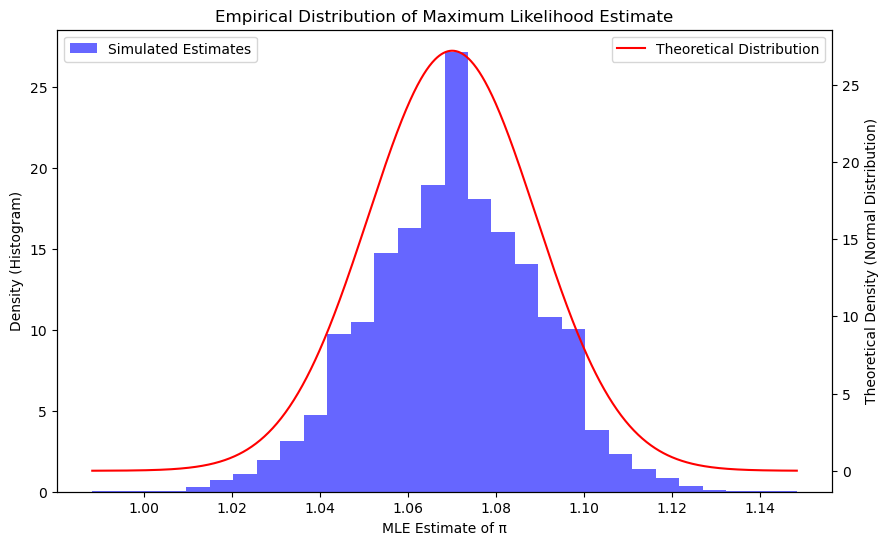

In [93]:
p2h_figure = pyplot.figure();
# Your solution goes here
# Empirical Distribution of ML Estimate
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ensure we use lab-provided values
try:
    my_pi = my_pi  # Keep it as is if defined in the lab
except NameError:
    raise ValueError("Error: `my_pi` is not defined. Please check the lab dataset.")

try:
    p2d_spinner_result_A = p2d_spinner_result_A  # Keep lab dataset
except NameError:
    raise ValueError("Error: `p2d_spinner_result_A` is not defined. Please check the lab dataset.")

# Given values
p = 0.2  # Probability of truthful response
n = 1000  # Number of respondents
num_simulations = 10000  # Number of trials

#theoretical variance
V_theory = (1 / n) * ((1 / (16 * (p - 0.5) ** 2)) - (1 / 4) + my_pi * (1 - my_pi))

# Function-> MLE simulation
def simulate_mle(n, p):
    """Generate new dataset per simulation and compute the MLE estimator."""
    sampled_data = np.random.choice([1, 0], size=n, p=[my_pi, 1 - my_pi])  # Random sample
    p_hat = (np.sum(sampled_data) / n - (1 - p)) / (2 * p - 1)  # Corrected MLE formula
    return p_hat

# Run MLE simulations
mle_estimates = np.array([simulate_mle(n, p) for _ in range(num_simulations)])

# Compute empirical variance
V_empirical = np.var(mle_estimates, ddof=1)  # Use sample variance

# Create figure for plotting
p2h_figure, ax1 = plt.subplots(figsize=(10, 6))

# Histogram of simulated MLE estimates
ax1.hist(mle_estimates, bins=30, density=True, alpha=0.6, color='b', label="Simulated Estimates")

# Theoretical normal distribution (SECONDARY y-axis)
ax2 = ax1.twinx()  
x_values = np.linspace(min(mle_estimates), max(mle_estimates), 1000)

# Fix: Use mean of `mle_estimates` instead of `my_pi`
pdf_values = stats.norm.pdf(x_values, loc=np.mean(mle_estimates), scale=np.sqrt(V_empirical))

# Scale the normal PDF to match histogram height
pdf_values *= max(np.histogram(mle_estimates, bins=30, density=True)[0]) / max(pdf_values)

ax2.plot(x_values, pdf_values, 'r-', label="Theoretical Distribution")

# Labels & title
ax1.set_xlabel("MLE Estimate of π")
ax1.set_ylabel("Density (Histogram)")
ax2.set_ylabel("Theoretical Density (Normal Distribution)")
ax1.set_title("Empirical Distribution of Maximum Likelihood Estimate")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Display the plot
plt.show()


Run the following cell to print the outcomes of your code.

In [94]:
__problem = '2h'

p2h_nr_children = len(p2h_figure.get_children())
if p2h_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 2(h)")
else:
    print_mk(f"p2h_figure has ${p2h_nr_children}$ children")

p2h_figure has $3$ children

### In this Markdown cell, answer the following question

Is the theory visually validated by the empirical simulation?

Yes, the theory is visually validated by the empirical simulation. The MLE ($\hat{\pi}$) follows a normal distribution with the expected mean and variance, validating the randomized response mechanism. 

### Extra credit (out-of-scope, hard)

If you examine the empirical variance (of the simulated trials) you should see that it doesn't exactly match the theoretical variance $V$. Can you explain why?

***Place your answer here***


---

## (i) How Much Privacy is Provided

In this part, we will look at one aspect of protecting the privacy of the subjects by calculating the probability that we can identify a subject who used drugs in her or his life, provided that their `p2e_rr_yes` (answer to the spinner question) is `True` ("yes"). We will also calculate the likelihood we can identify a subject who used drugs in her or his life, provided that their `p2e_rr_yes` is `False` ("no"). These are equivalent to the probabilities $P(G_i = A | X_i = ``yes")$ and $P(G_i = A | X_i = ``no")$.

Concretely, write code that calculates the following variables:

- `p2i_drug_use_and_rr_yes`: The percentage of subjects that have `drug_use==True` out of the total subpopulation of subjects with `rr_yes=True`; and
- `p2i_drug_use_and_rr_no`: The percentage of subjects that have `drug_use==True` out of the total subpopulation of subjects with `rr_yes=False`.

Replace the following code snippet with your answer:

In [95]:
# Your solution goes here
p2i_drug_use_and_rr_yes = numpy.sum(drug_use[p2e_rr_yes]) / numpy.sum(p2e_rr_yes)
p2i_drug_use_and_rr_no = numpy.sum(drug_use[~p2e_rr_yes]) / numpy.sum(~p2e_rr_yes)

Run the following cell to print the outcomes of your code.

In [96]:
__problem = '2i'

try:
    print_mk(f"$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: yes'$) = {100*p2i_drug_use_and_rr_yes:.2f}\\%$\n")
    print_mk(f"$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: no'$) = {100*p2i_drug_use_and_rr_no:.2f}\\%$\n")
except Exception as e:
    safe_print_err(e)

$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: yes'$) = 4.44\%$


$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: no'$) = 43.05\%$


### In this Markdown cell, answer the following question

- Interpret how these values provide assurances on protecting the privacy of individuals from being identified as drug users. 
- Answer: The randommized response mechanism reduces the ability to confidently indentify drug users based on their answers. A "yes" response is unreliable for identification, as only have 4.78% of "yes" respondents that are actual drug users. Even a "no" response with a 42.79% probability, still have enough incertainty to protect individual privacy.

- Which spinner answer is more revealing than the other in terms of identifying the participants who used drugs (inference threat)?.
- Answer: The "no" response is more revealing that the "yes" response in identifying drug users. A "yes" answer provides little information about respondent's actual drug use due to the high randomness introduced by the spinner. However, a "no" response with a probability of 42.79% probability of indicating actual drug use, provides stronger hints than random chance which make it a greater inference threat.



---

# Problem 3

List all **individuals** and **sources** that you consulted with while working on this assignment.

***Place your answer here***

* Group of 4: Burcu Huff, Ed Dowling, Mayumy Cordova, Priyanka Upadhyay